In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
#⽤来正常显示中⽂标签
plt.rcParams['axes.unicode_minus']=False 
#⽤来正常显示负号 #有中⽂出现的情况，需要u'内容'

In [2]:
data = pd.read_excel('上海餐饮数据.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96398 entries, 0 to 96397
Data columns (total 10 columns):
类别      96258 non-null object
行政区     96255 non-null object
点评数     96398 non-null int64
口味      96398 non-null float64
环境      96398 non-null float64
服务      96398 non-null float64
人均消费    96398 non-null int64
城市      96398 non-null object
Lng     96398 non-null float64
Lat     96398 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
data.head(10)

,类别,行政区,点评数,口味,环境,服务,人均消费,城市,Lng,Lat
0,烧烤,浦东新区,176,8.0,8.6,7.9,124,上海市,121.967860,30.884477
1,美食,闵行区,2,6.1,6.5,6.3,0,上海市,121.967781,30.883818
2,粤菜,浦东新区,141,6.7,7.2,6.6,141,上海市,121.933142,30.893224
3,海鲜,浦东新区,76,7.2,7.2,7.3,148,上海市,121.926062,30.899868
4,烧烤,浦东新区,600,7.2,7.6,7.0,143,上海市,121.925877,30.901100
5,本菜,嘉定区,69,8.2,8.9,8.4,66,上海市,121.925866,30.906384
6,本菜,嘉定区,69,8.2,8.9,8.4,66,上海市,121.925866,30.906384
7,浙菜,浦东新区,21,7.0,7.0,6.9,146,上海市,121.923567,30.900464
8,海鲜,浦东新区,46,6.1,6.2,6.0,77,上海市,121.922624,30.899486
9,烧烤,浦东新区,4,6.9,6.9,6.9,0,上海市,121.922592,30.899010


In [6]:
#数据清洗，清除空值、为0的数据

In [10]:
#检查空值数量
data.isnull().values.sum() 

283

In [11]:
#清除空值
#data.fillna() 填充
df = data.dropna()

In [12]:
#检查清除后的空值数量
df.isnull().values.sum()

0

In [15]:
df.columns

Index(['类别', '行政区', '点评数', '口味', '环境', '服务', '人均消费', '城市', 'Lng', 'Lat'], dtype='object')

In [16]:
df  =  df[['类别','口味', '环境', '服务','人均消费']]

In [19]:
df = df[(df['口味']>0)&(df['人均消费']>0)]

In [25]:
#计算性价比
df['性价比'] = (df['口味'] + df['环境'] + df['服务'])/ df['人均消费']
df.head(10)

/Users/dingxuanlin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,类别,口味,环境,服务,人均消费,性价比
0,烧烤,8.0,8.6,7.9,124,0.197581
2,粤菜,6.7,7.2,6.6,141,0.145390
3,海鲜,7.2,7.2,7.3,148,0.146622
4,烧烤,7.2,7.6,7.0,143,0.152448
5,本菜,8.2,8.9,8.4,66,0.386364
6,本菜,8.2,8.9,8.4,66,0.386364
7,浙菜,7.0,7.0,6.9,146,0.143151
8,海鲜,6.1,6.2,6.0,77,0.237662
10,浙菜,7.1,7.1,7.0,50,0.424000
11,快餐,6.8,7.0,6.9,31,0.667742


In [32]:
#分类别计算
df_groupby = df.groupby('类别').mean()
df_groupby

,口味,环境,服务,人均消费,性价比
类别,,,,,
亚菜,7.889937,8.036268,7.918868,101.958071,0.317688
助餐,7.394745,7.820197,7.672742,141.484401,0.236529
北菜,7.350125,7.234000,7.255375,50.478750,0.572403
午茶,7.500000,8.600000,7.700000,150.000000,0.158667
南菜,7.984874,8.255462,8.131933,91.411765,0.325731
啡厅,7.630942,7.772727,7.674215,46.251325,0.601575
川菜,7.489197,7.417549,7.397908,64.149872,0.427701
州菜,7.772500,7.722500,7.755000,71.125000,0.441502
常菜,7.311667,7.228333,7.255833,46.258333,0.611388


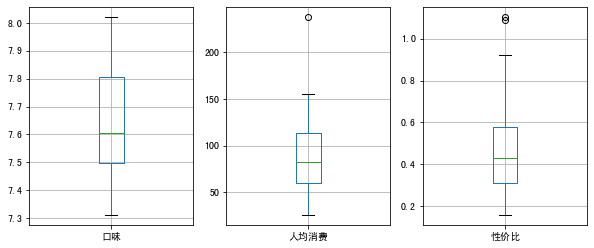

In [43]:
#箱型图查异常值
fig,axes = plt.subplots(1,3,figsize = (10,4))
df_groupby.boxplot(column = ['口味'], ax = axes[0])
df_groupby.boxplot(column = ['人均消费'], ax = axes[1])
df_groupby.boxplot(column = ['性价比'], ax = axes[2])

In [54]:
def f(data,col):
    q1 = data[col].quantile(q = 0.25)
    q3 = data[col].quantile(q = 0.75)
    iqr = q3 - q1
    t1 = q1 - 3*iqr
    t2 = q3 + 3*iqr
    return data[(data[col]>t1)&(data[col]<t2)][[col]]

In [55]:
data_kw = f(df_groupby,'口味')
data_rj = f(df_groupby,'人均消费')
data_xjb = f(df_groupby,'性价比')

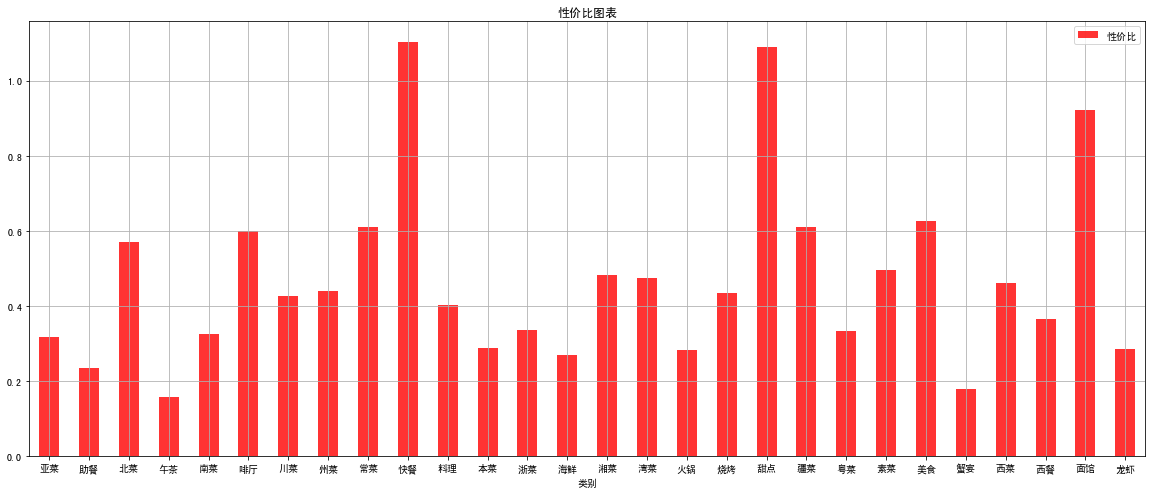

In [63]:
data_xjb.plot(kind='bar',
              figsize=(20,8),
              color = 'r',
              alpha = 0.8,
              grid = True,
              rot = 0,
             title='性价比图表')

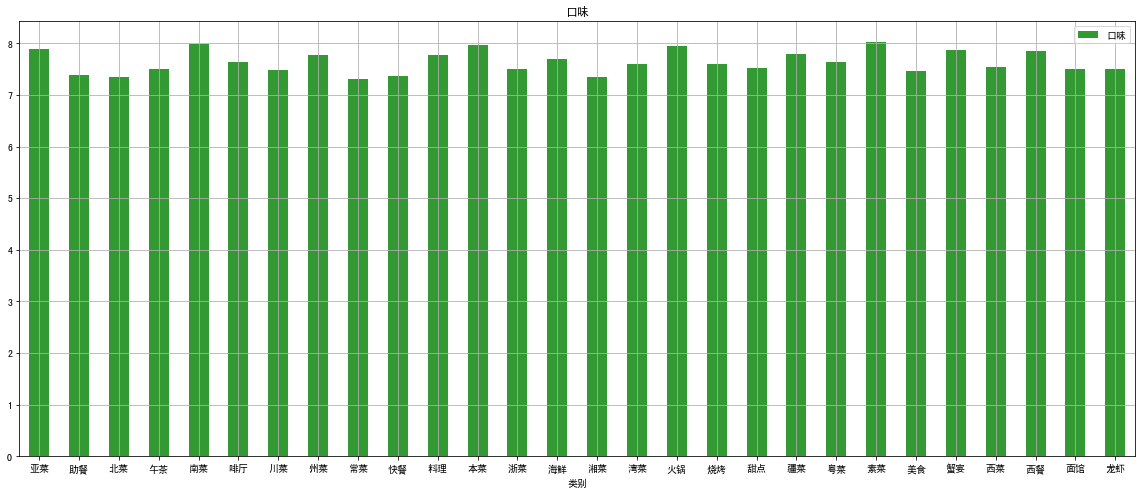

In [65]:
data_kw.plot(kind='bar',
              figsize=(20,8),
              color = 'g',
              alpha = 0.8,
              grid = True,
              rot = 0,
             title='口味图表')

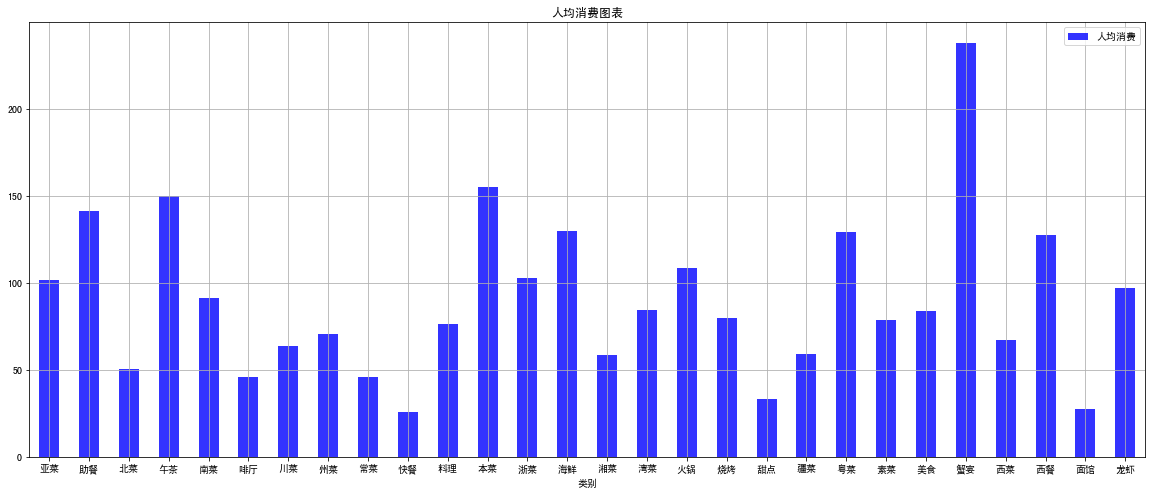

In [66]:
data_rj.plot(kind='bar',
              figsize=(20,8),
              color = 'b',
              alpha = 0.8,
              grid = True,
              rot = 0,
             title='人均消费图表')

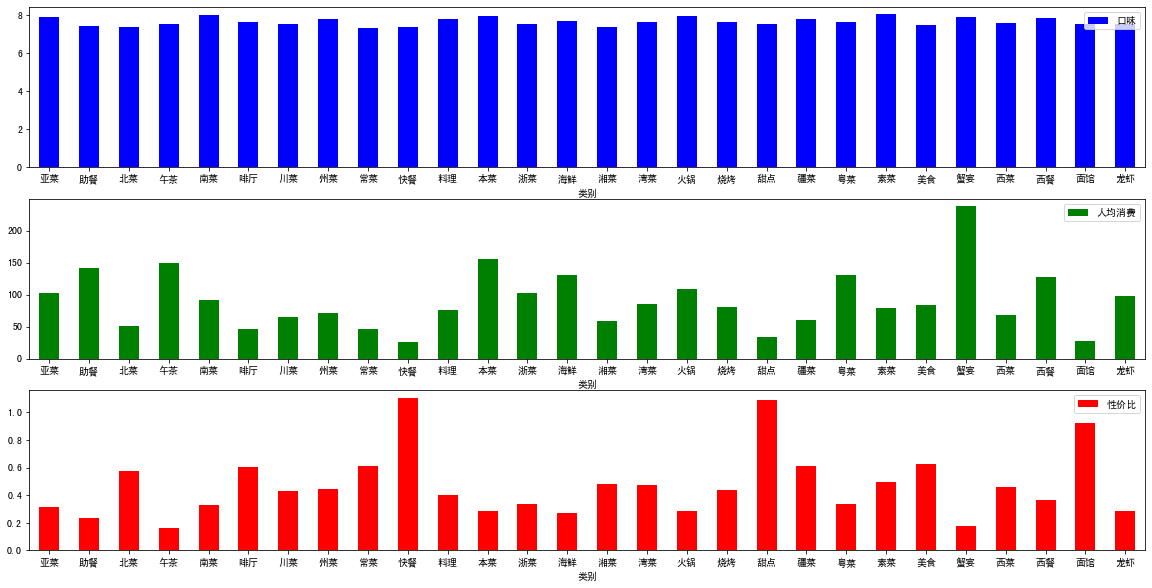

In [87]:
fig,axes = plt.subplots(3,1,figsize = (20,10))
data_kw.plot(kind='bar',ax=axes[0],color = 'b',rot=0)
data_rj.plot(kind='bar',ax=axes[1],color = 'g',rot=0)
data_xjb.plot(kind='bar',ax=axes[2],color = 'r',rot=0)

In [93]:
#标准化处理
data_kw_max_min = (data_kw - data_kw.min())/(data_kw.max()- data_kw.min())
data_rj_max_min = (data_rj - data_rj.min())/(data_rj.max()- data_rj.min())
data_xjb_max_min = (data_xjb - data_xjb.min())/(data_xjb.max()- data_xjb.min())

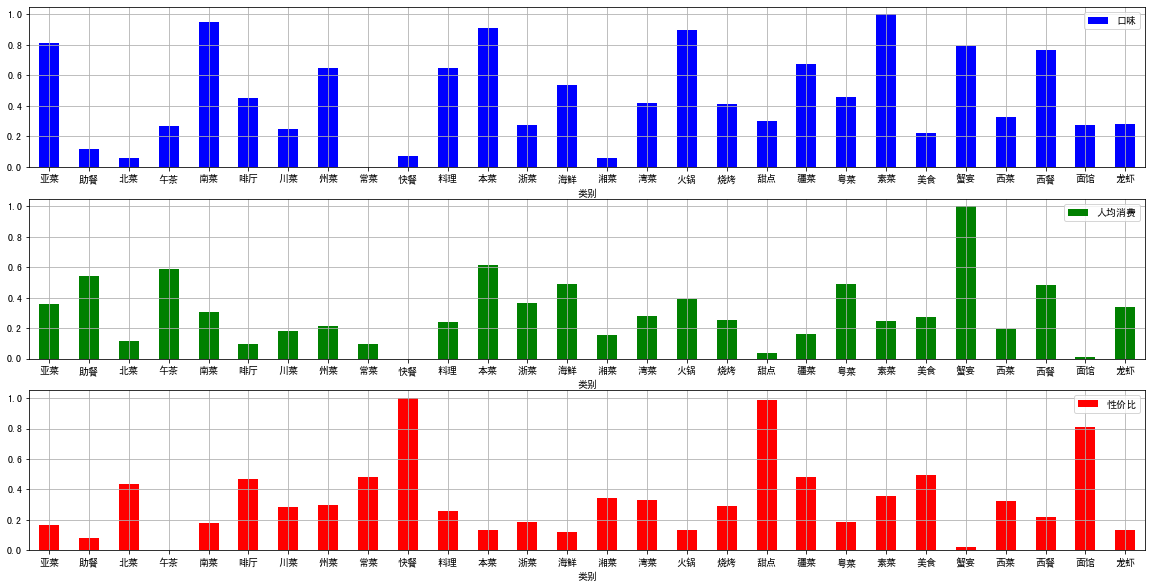

In [95]:
fig,axes = plt.subplots(3,1,figsize = (20,10))
data_kw_max_min.plot(kind='bar',ax=axes[0],color = 'b',rot=0,grid=True)
data_rj_max_min.plot(kind='bar',ax=axes[1],color = 'g',rot=0,grid=True)
data_xjb_max_min.plot(kind='bar',ax=axes[2],color = 'r',rot=0,grid=True)

In [108]:
#选择一个好的行业  权重自己设计  比如按照 口味:人均消费:性价比  = 2:3:5 的比例去计算 

In [120]:
data = pd.merge(data_kw_max_min,data_rj_max_min,left_index = True, right_index = True)
data = pd.merge(data,data_xjb_max_min,left_index = True, right_index = True)

In [143]:
data['分数'] = 0.2*data['口味'] + 0.3*data['人均消费']+0.5*data['性价比']
data.sort_values('分数',ascending=False)[:5]

,口味,人均消费,性价比,分数
类别,,,,
甜点,0.299659,0.034659,0.985296,0.562977
快餐,0.070568,0.000000,1.000000,0.514114
蟹宴,0.791228,1.000000,0.022649,0.469570
面馆,0.272656,0.009207,0.807730,0.461159
素菜,1.000000,0.248469,0.358570,0.453826


In [144]:
#得出结论 我要在上海这个地方选择开甜品店